# First Simple Model

The purpose of the FSM is to get a basic "data in, predictions out" model going, with no focus on improving any metrics yet. 

For my FSM, I'm going to use a simple fully connected dense neural network. One hidden layer, no fancy stuff or other parameters yet.

In [13]:
import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Flatten
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load images for modeling

Use `ImageDataGenerator` class from Keras with `flow_from_directory` method to feed images into the model.

Keeping default parameters for now as far as `target_size=(256, 256)` and all that.

In [2]:
# Image folder for training
train_dir = 'input_images/train'

In [3]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [5]:
# Get data from directories and scale
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
val_gen = datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1009 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


## Build model and train

In [10]:
# Instatiate model
fsm = models.Sequential()

# Add model layers
fsm.add(Flatten(input_shape=(256, 256, 3)))
fsm.add(Dense(32, activation='relu'))
fsm.add(Dense(1, activation='sigmoid'))

# Compile
fsm.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['acc', 'Recall', 'Precision'])

In [11]:
fsm_history = fsm.fit(train_gen, 
                      epochs=30,
                      validation_data=val_gen)

Epoch 1/30
32/32 [==============================] - 130s 4s/step - loss: 2.0801 - acc: 0.5134 - recall: 0.3713 - precision: 0.5250 - val_loss: 0.6982 - val_acc: 0.4960 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 131s 4s/step - loss: 0.6934 - acc: 0.5015 - recall: 0.5246 - precision: 0.5057 - val_loss: 0.6922 - val_acc: 0.5397 - val_recall: 0.1339 - val_precision: 0.7391
Epoch 3/30
32/32 [==============================] - 123s 4s/step - loss: 0.6855 - acc: 0.5808 - recall: 0.6896 - precision: 0.5698 - val_loss: 0.6671 - val_acc: 0.6706 - val_recall: 0.7953 - val_precision: 0.6392
Epoch 4/30
32/32 [==============================] - 121s 4s/step - loss: 0.6513 - acc: 0.6571 - recall: 0.5717 - precision: 0.6945 - val_loss: 0.6198 - val_acc: 0.6706 - val_recall: 0.6772 - val_precision: 0.6719
Epoch 5/30
32/32 [==============================] - 121s 4s/step - loss: 0.6318 - acc: 0.6452 - recall: 0.5501 - precision: 0.6846 - val_los

In [16]:
fsm.save('models/fsm.h5')

Training eval:
32/32 [==============================] - 134s 4s/step - loss: 0.4472 - acc: 0.7631 - recall: 0.7741 - precision: 0.7606

Validation eval:
8/8 [==============================] - 20s 3s/step - loss: 0.7961 - acc: 0.7063 - recall: 0.8898 - precision: 0.6532


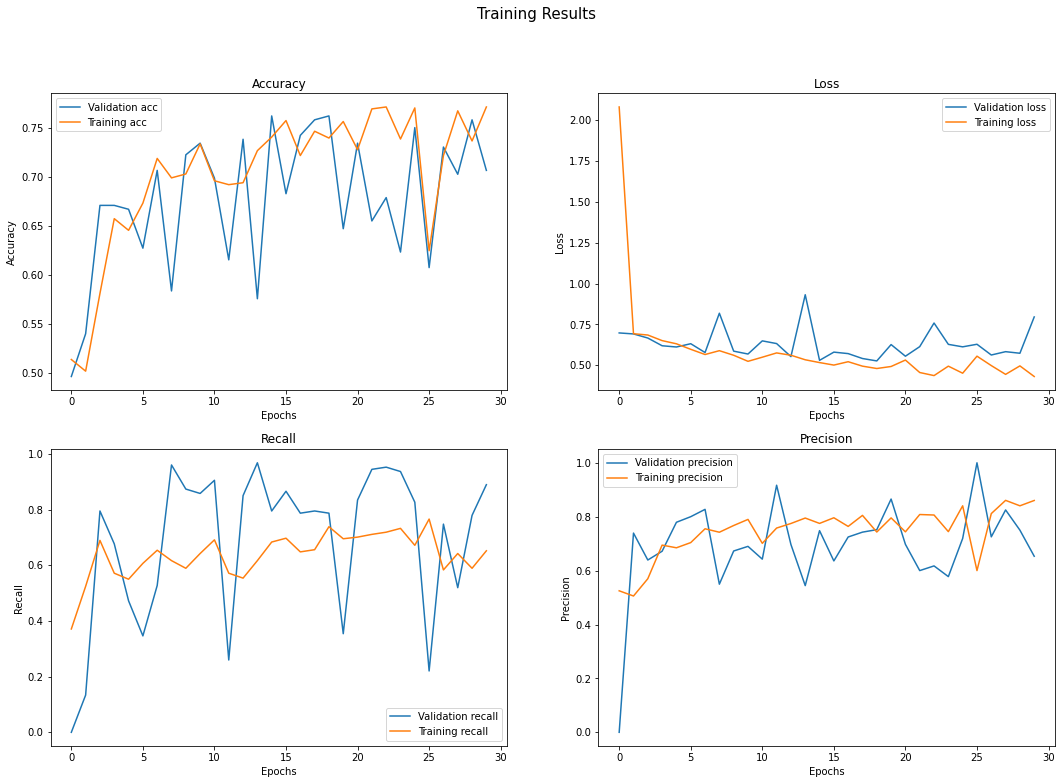

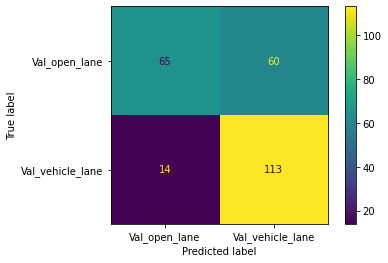

In [19]:
visualize_results(fsm_history, fsm, train_gen, val_gen)

Not a bad place to start! Validation accuracy of 70% and precision of 65%--my goal is 80% for acc and precision. Thrilled to see that not only is it running through the model, but it's doing better than chance.

Interesting to see that it's favoring the target class; perhaps there is less variety there than in the non-target class? As I start to iterate more I'll focus on revealing the intermediate layers, especially when I get to a CNN, in an effort to see what the model is attending to.

## Pickling the results

For later analysis, plotting, comparison, etc.

In [21]:
from pickle import load
from pickle import dump

In [22]:
dump(fsm_history.history, open('models/fsm_history.pkl', 'wb'))